# 🎓 A Beginner's Guide to Linear Regression

In this notebook, we'll walk through the entire process of building a linear regression model. We will use the popular "Advertising" dataset to predict product sales based on advertising spending.

**Our Goal:** To understand the relationship between different advertising channels (TV, Radio, Newspaper) and sales, and to build a model that can predict future sales.

# Step 1: Setting Up Our Workspace

First, we need to import the essential Python libraries that we'll use for data manipulation, visualization, and machine learning.

**pandas:** For loading and working with data.

**matplotlib & seaborn:** For creating visualizations to explore the data.

**scikit-learn:** For splitting our data and building the regression model.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For building the model and evaluating it
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Set a style for our plots
sns.set_style('whitegrid')

# Step 2: 📊 Loading and Exploring the Data (EDA)

Before we can build a model, we need to understand our data. This process is called Exploratory Data Analysis (EDA).

In [3]:
df = pd.read_csv('advertising.csv')

# Let's look at the first few rows of our data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
# Get some basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Visualizing Relationships

Now, let's visualize the relationships between our variables. A pairplot is fantastic for this because it shows scatterplots between every pair of variables.

Key Insight: Look at the bottom row. The plot of TV vs. Sales shows a clear, strong positive linear relationship. The relationship between Radio and Sales also looks positive. Newspaper vs. Sales seems much more scattered and less clear.


Pairplot of the dataset:


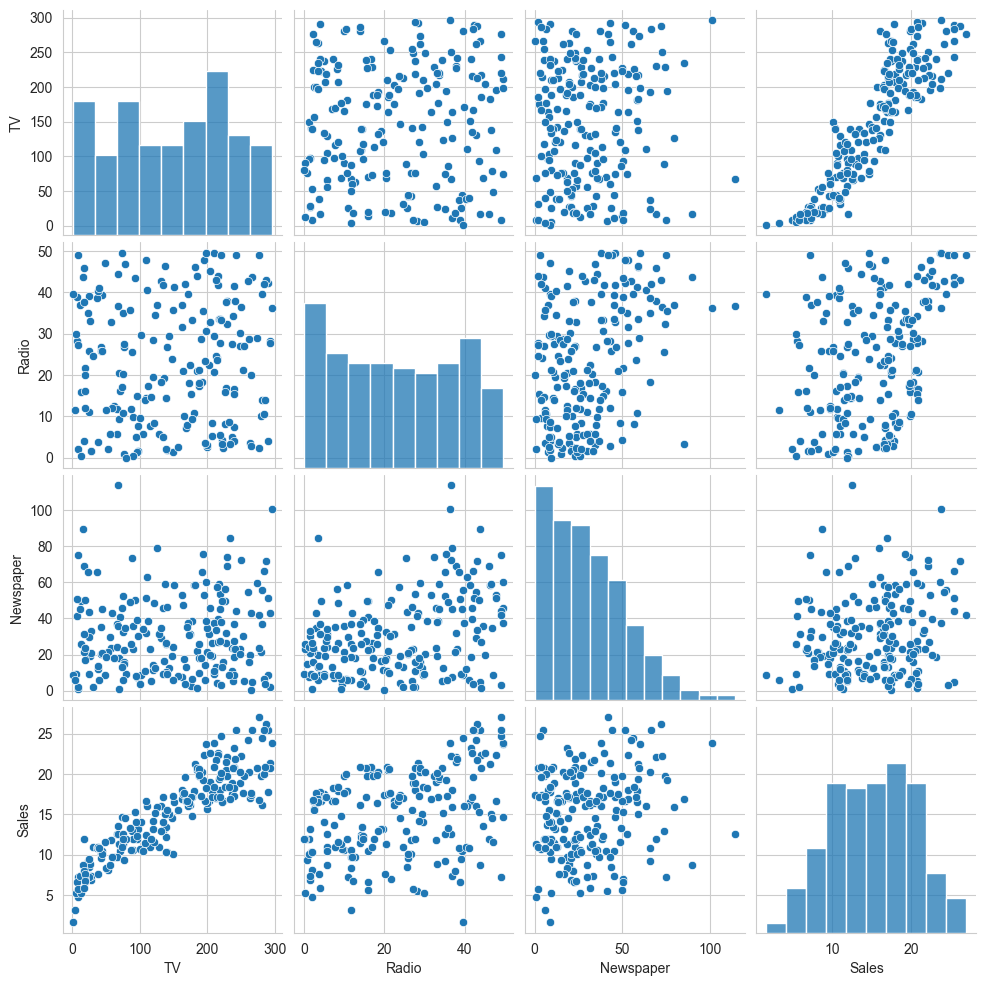

In [5]:
# Create a pairplot to see relationships between variables
# We are looking for a linear relationship between our features (TV, Radio, Newspaper) and our target (Sales)
print("\nPairplot of the dataset:")
sns.pairplot(df)
plt.show()

# Step 3: 🧠 Building a Simple Linear Regression Model

Let's start with the simplest case: predicting 'Sales' using only one feature. Since 'TV' showed the strongest relationship, we'll use that one.

**A. Prepare the Data**

We need to define our "features" (the input, X) and our "target" (the output, y).

In [10]:
# Define our feature (X) and target (y)
# We use [['TV']] to keep X as a DataFrame, which scikit-learn expects
X = df[['TV']]  # DataFrame (2D) → shape: (200, 1)
y = df['Sales'] # Series (1D) → shape: (200,)

#print(X)
#print(y)

# B. Split Data into Training and Testing Sets

This is a critical step in machine learning. We "train" our model on one part of the data and then "test" how well it performs on a separate, unseen part. This tells us if our model is actually good at making predictions.

**Note:** Actually, theoretically, the above ‘test’ set is known as the ‘validation set’, and it is used to evaluate the model. 

In [11]:
# Split the data into training (80%) and testing (20%) sets
# random_state ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)

Training set shape (X_train): (160, 1)
Testing set shape (X_test): (40, 1)


# C. Create and Train the Model

Now we create an instance of the LinearRegression model and "fit" it to our training data. The .fit() method is where the model learns the relationship between TV and Sales. 

In [12]:
# Create a Linear Regression model object
model_simple = LinearRegression()

# Train the model using our training data
model_simple.fit(X_train, y_train)

print("Simple Linear Regression model has been trained!")

Simple Linear Regression model has been trained!


# D. Interpret the Model's Coefficients

The trained model has learned two things: the intercept (w₀) and the coefficient for TV (w₁). 

In [17]:
# Print the intercept and coefficient
print(f"Intercept (w₀): {model_simple.intercept_:.4f}")
print(f"Coefficient for TV (w₁): {model_simple.coef_[0]:.4f}")

Intercept (w₀): 7.0071
Coefficient for TV (w₁): 0.0555


# Step 4: 📈 Evaluating the Simple Model

Now, let's see how well our trained model performs on the 'X_test' data it has never seen before.

First, we'll visualize our model's fit by plotting the regression line over the actual test data points. 

The red line is our model's prediction. It looks like a pretty good fit!

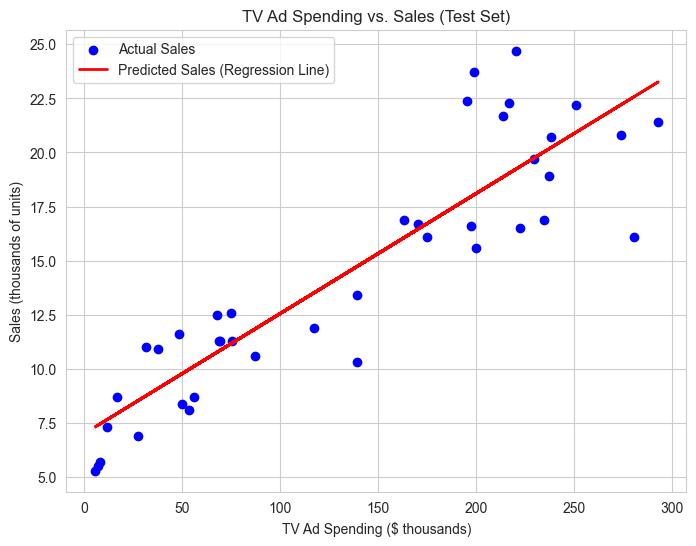

In [20]:
# Plot the regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, model_simple.predict(X_test), color='red', linewidth=2, label='Predicted Sales (Regression Line)')
plt.title('TV Ad Spending vs. Sales (Test Set)')
plt.xlabel('TV Ad Spending ($ thousands)')
plt.ylabel('Sales (thousands of units)')
plt.legend()
plt.show()

# ☝️ Predicting with the Simple Model (TV only)

Let's say you want to predict the sales if you spend **$220,000 on TV ads.**

You need to pass this value to the .predict() method inside double square brackets [[]].

In [23]:
# The value you want to predict for
tv_spending = 220 

# Put the value into a 2D list-like structure
# The outer brackets represent the list of observations (we have 1)
# The inner brackets represent the list of features for that observation (just TV)
new_data_simple = [[tv_spending]]

# Use the trained simple model to predict
predicted_sales_simple = model_simple.predict(new_data_simple)

print(f"Predicted sales for ${tv_spending}k in TV ads: {predicted_sales_simple[0]:.2f} thousand units.")

Predicted sales for $220k in TV ads: 19.21 thousand units.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
